<a href="https://colab.research.google.com/github/carlosmding/project_intro_IA/blob/main/04_modelo_con_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import math
from seaborn import distplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error
from matplotlib.patches import split_path_inout
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot

from sklearn.model_selection import GridSearchCV

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_auc_score

**1. Cargar Dataset**

Se carga el dataset final luego del preprocesamiento. Se cargan los archivos Dataset.csv y y.csv

In [3]:
X = pd.read_csv('Dataset.csv', sep=",") 
y = pd.read_csv('y.csv', sep=",") 

X=X.drop(columns=['Unnamed: 0'])
y=y.drop(columns=['Unnamed: 0'])


**2. Generador de muestras sintéticas**

In [4]:
pca=PCA(n_components=30) 
pca.fit(X) #
X_pca=pca.transform(X)

In [5]:
ros = RandomOverSampler(random_state=42, sampling_strategy=1.0)                          
Xres, yres = ros.fit_resample(X_pca, y)
Xtrain, Xtst, ytrain, ytst = train_test_split(Xres,yres, test_size=0.1) #Se toma el 90 % de los datos para Entrenar
print (Xtrain.shape, ytrain.shape, Xtst.shape, ytst.shape)
X=Xtrain
y=ytrain

(26409, 30) (26409, 1) (2935, 30) (2935, 1)


**3. Cálculo pesos de la clase Parámetro que se usa para minimizar el efecto del desbalance del dataset**

In [6]:
def dar_peso_clase():
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 17)
  Number_Muestras_por_Clase = ytrain.value_counts()
  Number_Muestras_por_Clase = Number_Muestras_por_Clase.sort_index(axis = 0, ascending = True)
  Numero_de_Clases = len(Number_Muestras_por_Clase.index)
  Peso_por_Clase = len(ytrain)/(Numero_de_Clases*Number_Muestras_por_Clase)
  return Peso_por_Clase

**4. Modelo de clasificación random Forest Entrenamiento con el 90 % de los datos**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [7]:
weight = dar_peso_clase() 
kf = KFokf = KFold(n_splits=10, random_state = True,shuffle=True)

#max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”
#  random_state=True,
#min_weight_fraction_leaf=0.00005,
#n_estimators=5,
#min_impurity_decrease=0.005,
# ccp_alpha=0.000001,
# max_features ="sqrt",
#  warm_start=True,
#  n_jobs=2,

X_test =0
Y_test =0

#warm_start mejoro la velocidad de ejecucion, mejoró la metrica
classifier = RandomForestClassifier(min_samples_split=10,
                                    ccp_alpha=0.000001,
                                    criterion='gini',
                                    class_weight = {0: weight[0], 1: weight[1]},
                                    random_state=True,max_features ="sqrt",
                                    warm_start=True,min_impurity_decrease=0.000005)

for train_index, test_index in kf.split(X):
    
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    modelo = classifier.fit(Xtrain, ytrain)
    ypred = modelo.predict(Xtest)

    print()
    print(confusion_matrix(ytest, ypred))
    print(classification_report(ytest, ypred, digits =4, labels=[0,1]))
    s = roc_auc_score(ytest, modelo.predict(Xtest))
    print(f'Best val auc: {s: .4f}')

<ipython-input-7-3ff00dc4ed98>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)



[[ 888  418]
 [ 108 1227]]
              precision    recall  f1-score   support

           0     0.8916    0.6799    0.7715      1306
           1     0.7459    0.9191    0.8235      1335

    accuracy                         0.8008      2641
   macro avg     0.8187    0.7995    0.7975      2641
weighted avg     0.8179    0.8008    0.7978      2641

Best val auc:  0.7995

[[ 960  349]
 [ 127 1205]]
              precision    recall  f1-score   support

           0     0.8832    0.7334    0.8013      1309
           1     0.7754    0.9047    0.8351      1332

    accuracy                         0.8198      2641
   macro avg     0.8293    0.8190    0.8182      2641
weighted avg     0.8288    0.8198    0.8183      2641



<ipython-input-7-3ff00dc4ed98>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
<ipython-input-7-3ff00dc4ed98>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Best val auc:  0.8190

[[ 949  360]
 [ 122 1210]]
              precision    recall  f1-score   support

           0     0.8861    0.7250    0.7975      1309
           1     0.7707    0.9084    0.8339      1332

    accuracy                         0.8175      2641
   macro avg     0.8284    0.8167    0.8157      2641
weighted avg     0.8279    0.8175    0.8159      2641

Best val auc:  0.8167


<ipython-input-7-3ff00dc4ed98>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
<ipython-input-7-3ff00dc4ed98>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(



[[ 946  381]
 [ 110 1204]]
              precision    recall  f1-score   support

           0     0.8958    0.7129    0.7940      1327
           1     0.7596    0.9163    0.8306      1314

    accuracy                         0.8141      2641
   macro avg     0.8277    0.8146    0.8123      2641
weighted avg     0.8281    0.8141    0.8122      2641

Best val auc:  0.8146

[[ 973  389]
 [ 108 1171]]
              precision    recall  f1-score   support

           0     0.9001    0.7144    0.7966      1362
           1     0.7506    0.9156    0.8249      1279

    accuracy                         0.8118      2641
   macro avg     0.8254    0.8150    0.8107      2641
weighted avg     0.8277    0.8118    0.8103      2641

Best val auc:  0.8150

[[ 921  353]
 [ 129 1238]]
              precision    recall  f1-score   support

           0     0.8771    0.7229    0.7926      1274
           1     0.7781    0.9056    0.8371      1367

    accuracy                         0.8175      2641


<ipython-input-7-3ff00dc4ed98>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
<ipython-input-7-3ff00dc4ed98>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(



[[ 985  351]
 [ 110 1195]]
              precision    recall  f1-score   support

           0     0.8995    0.7373    0.8104      1336
           1     0.7730    0.9157    0.8383      1305

    accuracy                         0.8254      2641
   macro avg     0.8363    0.8265    0.8243      2641
weighted avg     0.8370    0.8254    0.8242      2641

Best val auc:  0.8265

[[ 920  397]
 [ 120 1204]]
              precision    recall  f1-score   support

           0     0.8846    0.6986    0.7807      1317
           1     0.7520    0.9094    0.8232      1324

    accuracy                         0.8042      2641
   macro avg     0.8183    0.8040    0.8020      2641
weighted avg     0.8181    0.8042    0.8020      2641



<ipython-input-7-3ff00dc4ed98>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
<ipython-input-7-3ff00dc4ed98>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Best val auc:  0.8040

[[ 955  369]
 [ 121 1196]]
              precision    recall  f1-score   support

           0     0.8875    0.7213    0.7958      1324
           1     0.7642    0.9081    0.8300      1317

    accuracy                         0.8145      2641
   macro avg     0.8259    0.8147    0.8129      2641
weighted avg     0.8260    0.8145    0.8129      2641

Best val auc:  0.8147

[[ 965  363]
 [ 117 1195]]
              precision    recall  f1-score   support

           0     0.8919    0.7267    0.8008      1328
           1     0.7670    0.9108    0.8328      1312

    accuracy                         0.8182      2640
   macro avg     0.8294    0.8187    0.8168      2640
weighted avg     0.8298    0.8182    0.8167      2640

Best val auc:  0.8187


<ipython-input-7-3ff00dc4ed98>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


**5. Curva ROC: RandomForest**


Sin entrenar: ROC AUC=0.500
Algoritmo RandomForest: ROC AUC=0.819




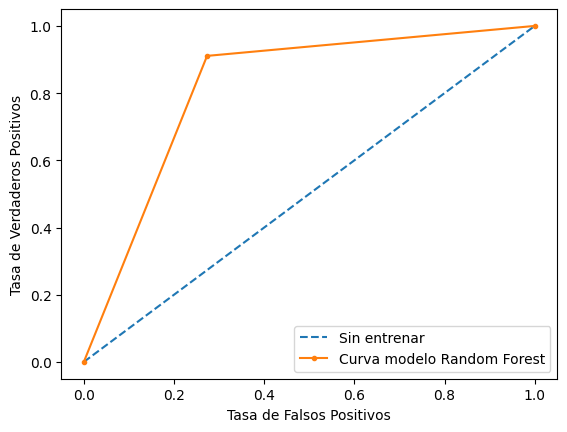

In [8]:
classes = classifier.predict(Xtest)
ns_probs = [0 for _ in range(len(ytest))]
ns_auc = roc_auc_score(ytest, ns_probs,average='weighted')
classifier_auc = roc_auc_score(ytest,classes,average='weighted')
#aps = average_precision_score(ytest, ns_probs)
print()
#print("Average_presicion_score "+str(aps))
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Algoritmo RandomForest: ROC AUC=%.3f' % (classifier_auc))
print()
classifier_probs = classes[:]
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
classifier_fpr,classifier_tpr, _ = roc_curve(ytest, classifier_probs)
print()
pyplot.plot(classifier_fpr,classifier_tpr, marker='.', label='Curva modelo Random Forest')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()